## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification? **Regression uses input features to forecast a continuous variable, like predicting temperature or sales, while classification employs features to categorize data into distinct groups, such as determining whether an email is spam or not.**
2. What is a confusion table? What does it help us understand about a model's performance? **A confusion table compares the actual outcomes with the model’s predictions, showing not only the correct classifications but also the types of errors, such as false positives and false negatives.**
3. What does the SSE quantify about a particular model? **The Sum of Squared Errors (SSE) captures the magnitude of the model’s prediction errors by calculating the squared differences between predicted and actual values, summing them across all data points. This offers a measure of the model's overall deviation from reality.**
4. What are overfitting and underfitting? **Overfitting occurs when a model becomes too tailored to the training data, capturing insignificant details that don't generalize well to new data. Underfitting happens when a model is too simplistic and misses significant patterns in the data, leading to poor predictions.**
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance? **When the data is split and a portion is held back for testing, it mimics real-world conditions where the model must work on new data. This gives a clearer picture of how well the model will perform on future tasks, avoiding over-optimistic results from the training data alone.**
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
**Class label predictions provide a straightforward answer, making them easy to interpret and act on. However, without probabilities, these predictions lack context about the model's confidence level. For instance, if a model predicts label A, we won’t know if it assigned a probability of 0.51 to A and 0.49 to B, indicating high uncertainty, or if it was a more confident prediction with a probability of 0.95 for A. In contrast, probability distributions over class labels provide insight into how confident the model is in its predictions, which can be useful for decision-making especially when the stakes are high. However, this approach can make interpretation more complex since it presents multiple potential outcomes rather than a single, clear answer.**

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
**Predictions for type 2 are fairly accurate, while predictions for types 1, 3, 4, and 5 are less reliable.**
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.
**Due to the relatively low accuracy across types, especially 1, 3, 4, and 5, the model should be used cautiously. In something like a humanitarian aid agency, this model might serve as an initial risk assessment tool for type 2.**

In [1]:
! git clone https://github.com/annekuma/knn/

Cloning into 'knn'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 71 (delta 22), reused 8 (delta 8), pack-reused 39 (from 1)
Receiving objects: 100% (71/71), 13.54 MiB | 14.66 MiB/s, done.
Resolving deltas: 100% (27/27), done.


Data Shape: (338, 4)
Data Sample:
     voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
Descriptive Stats:
           voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


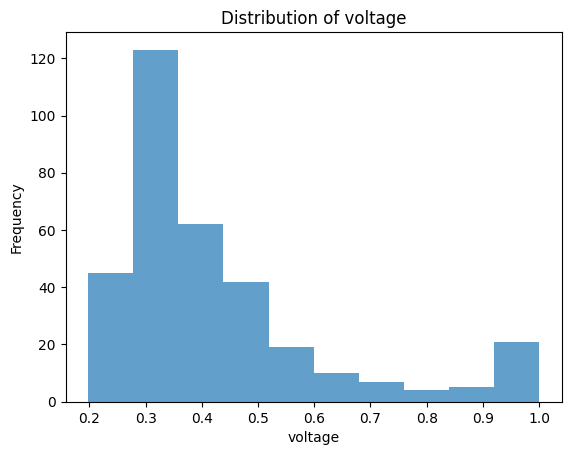

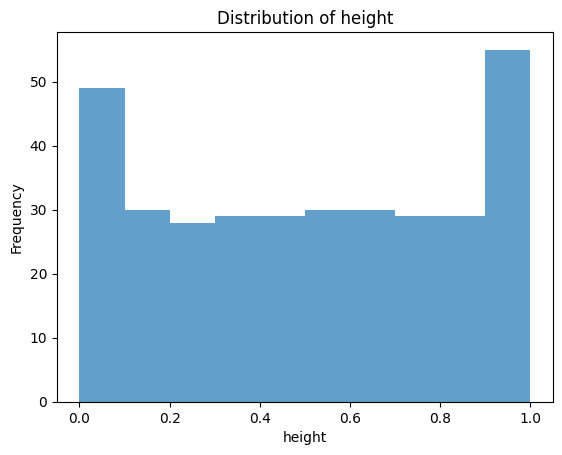

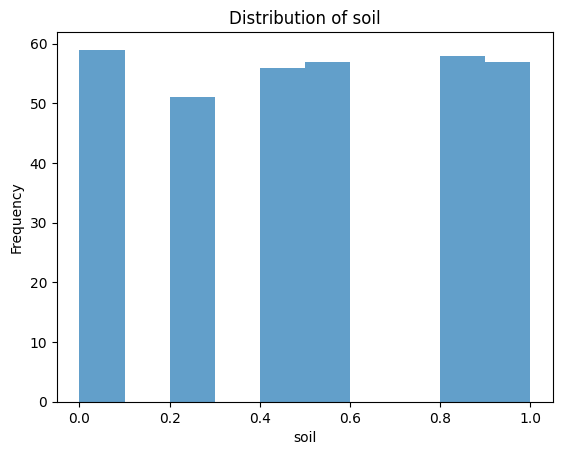

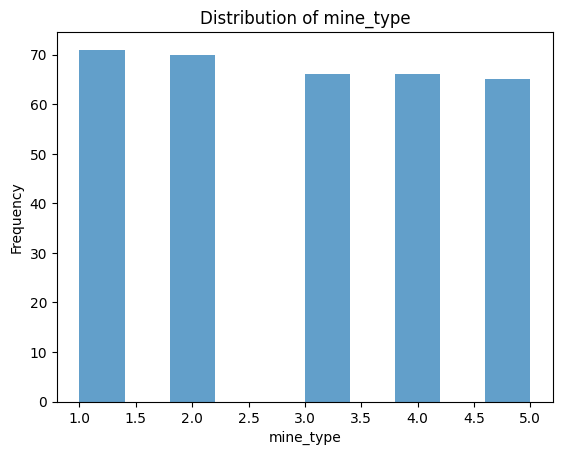

Optimal number of neighbors (k): 2
Best accuracy achieved: 0.41


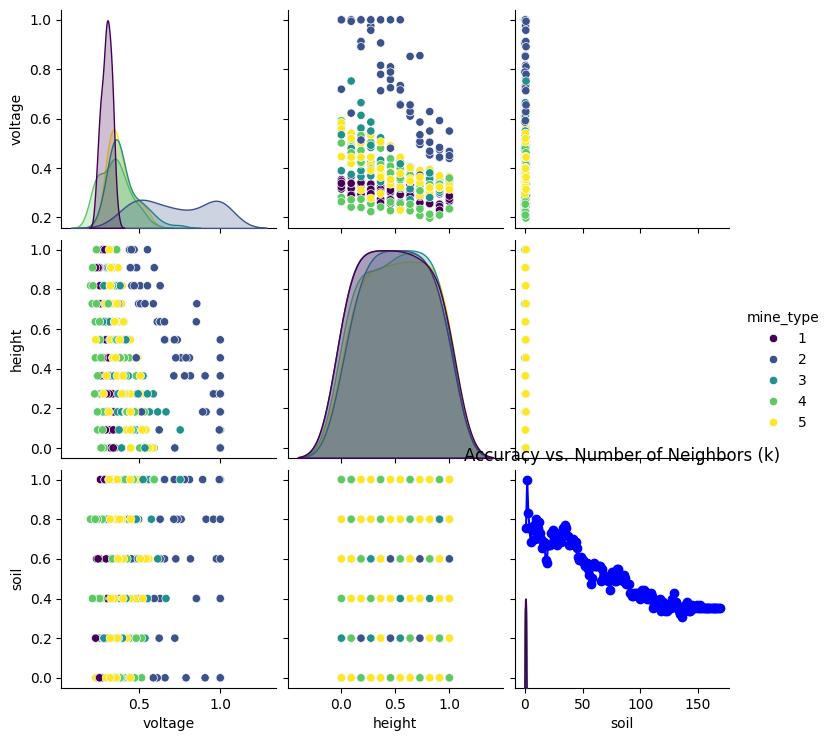

Confusion Matrix:
 [[23  0  9  4  1]
 [ 1 32  4  3  0]
 [12  1 10  3  1]
 [14  5  9  4  3]
 [11  1 15  2  1]]


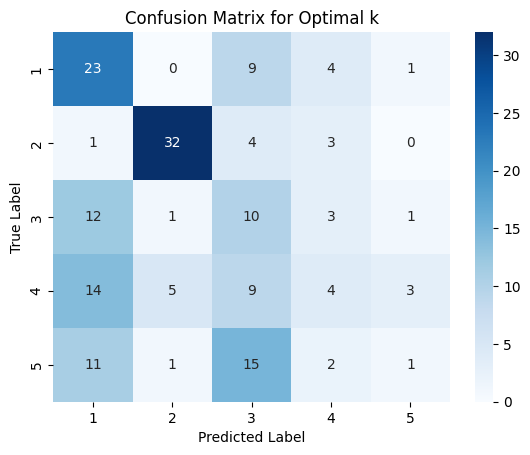

Overall Accuracy: 0.41


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = pd.read_csv('/content/knn/data/land_mines.csv')

print("Data Shape:", df.shape)
print("Data Sample:\n", df.head())
print("Descriptive Stats:\n", df.describe())

for feature in ['voltage', 'height', 'soil', 'mine_type']:
    plt.hist(df[feature], bins=10, alpha=0.7)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

sns.pairplot(df, hue="mine_type", palette='viridis')

X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=200)

max_k = len(y_train)
accuracy_scores = []

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

best_k = np.argmax(accuracy_scores) + 1
best_accuracy = max(accuracy_scores)

print(f"Optimal number of neighbors (k): {best_k}")
print(f"Best accuracy achieved: {best_accuracy:.2f}")

plt.plot(range(1, max_k + 1), accuracy_scores, marker='o', color='b')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.grid(True)
plt.show()

optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(X_train, y_train)
predictions = optimal_knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y_test), columns=np.unique(y_test))
sns.heatmap(conf_matrix_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for Optimal k")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

overall_accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.